In [41]:
import pandas as pd
import matplotlib.pyplot as plt

#log = 'logs/recovery-data.csv'
log = 'logs/Sensor_data_100Hz_2.csv'
log_type = 'simcon'

#log = 'logs/recovery-data.csv'
#log_type = 'rec'

sensor_mapper = {'f9c9f80b-679c-41ba-a720-1d9d7fd54d4f': 'acc_z_0',
                 '1ec96258-c5b0-4ace-b138-d4b6ebb94077': 'acc_z_0',
                 '54f15804-28c3-4b22-82df-d95b40b9a3d2': 'acc_z_1',
                 '294906ee-7119-43a0-8b2d-960a8b5b3d34': 'acc_z_1',
                 'cc6a95a0-bfd3-4cb0-88b8-00ad2bfbdd33': 'acc_z_2',
                 '22752219-cefa-4fea-8cbb-590e90be031b': 'acc_z_2',
                 'a2cd99cf-32eb-47f0-845d-6b7d3515d298': 'baro_0',
                 '21bc6e03-949d-4895-bdc5-3813f477c650': 'baro_0',
                 'ff1f6c69-0601-49a0-9bf8-11b0082debd7': 'baro_1',
                 '3c25aa65-242d-4527-b812-75d7b481ee66': 'baro_1',
                 'e99c3424-957e-4c60-a8f8-821857457f32': 'baro_2',
                 '5e32df81-1a9f-4453-973c-42dc35df8763': 'baro_2',
                 'f03e12b2-39f3-4039-b72b-3cfd3273083c': 'temp_0',
                 'cd4c5737-afe1-4d57-8744-e9d47648f074': 'temp_0',
                 '7511b0fa-77ab-4ed8-8e20-11fa19c1ad84': 'temp_1',
                 'eab2f675-3fc2-40ce-a371-b1a2ea1c9c7d': 'temp_1',
                 'c3f011cf-9229-4dc2-904b-0f6a3e2fdf2b': 'temp_2',
                 '94e18422-443a-46a7-9bfc-476da6236470': 'temp_2',}

rec_col_mapper = {'Az_IMU1': 'acc_z_0',
                  'Az_IMU2': 'acc_z_1',
                  'P_BARO1': 'baro_0',
                  'P_BARO2': 'baro_1',
                  'T_BARO1': 'temp_0',
                  'T_BARO2': 'temp_1',}

if log_type == 'simcon':
    log_df = pd.read_csv(log, index_col = 0, converters = {'t': lambda x: float(x) * 1000, # convert to milliseconds
                                                           'flight_sensor_id': lambda x: sensor_mapper[x],
                                                           'value': lambda x: x.strip('[]')})
    log_df = log_df.pivot(index='t', columns='flight_sensor_id', values='value')
    log_df.index = log_df.index - log_df.index.min()  #set first t to 0
    #log_df.head()
else:
    log_df = pd.read_csv(log, index_col = 0, usecols = ['Time', 'T_BARO1', 'T_BARO2', 'P_BARO1', 'P_BARO2', 'Az_IMU1', 'Az_IMU2'])
    log_df.index.name = 't'
    log_df = log_df.rename(columns = rec_col_mapper)
    log_df.index = log_df.index - log_df.index.min()  #set first t to 0
    
for timestamp, sensor_readings in log_df.iterrows():
    b = float(sensor_readings["temp_0"])
    print(b)

19.50701944
20.13011953
20.10578901
20.98214837
20.12358199
19.73245938
20.88993156
19.91188843
20.08249569
20.1842062
19.82787005
19.75200094
19.97305286
20.37822637
19.79083781
20.28891567
20.01845022
21.6234417
19.72083941
20.04195017
19.88924749
20.17408844
20.68971445
20.966041
19.15168767
19.77618818
19.90818109
20.11375979
19.42024734
20.36970075
20.17333282
19.85615316
19.31239805
20.19858488
19.91057651
19.71495578
19.7305379
20.72214169
19.36043079
19.85062203
19.95982693
19.89236951
19.50560156
20.35010773
20.22910453
19.31444719
21.06878023
19.96787911
20.49195364
19.30126949
20.2038492
20.12310959
19.38730512
19.78841191
19.91144154
20.61347802
20.2016844
19.24202172
19.60319498
18.77437084
20.39475304
19.91444869
18.71796945
20.2185921
19.59237146
20.75523698
19.52298562
19.69760879
20.26309737
19.42243316
19.74771432
20.3362457
19.3511876
20.08706478
19.83998372
19.7514244
19.41351644
20.11559293
19.34983841
19.65082423
19.86629454
19.79468736
19.91348293
20.15050493
20.

10.64134557
11.04511434
10.79121306
11.94044029
10.93252216
11.79774645
10.70609024
11.305993
10.69279024
10.88248128
10.86114666
10.6848188
11.17063677
10.86624403
11.59956483
10.74345675
10.69539676
11.22403365
11.02144757
10.90197034
10.45462017
11.35983974
11.30661186
10.49432083
10.18110455
11.15721819
11.17679474
10.86186741
10.6140742
11.25619825
11.73262653
10.89558125
10.62298188
11.41243035
11.05384978
10.71662273
11.62176187
10.62753257
11.67724281
9.84714793
11.27301993
10.96219939
11.05183453
11.38603231
10.83148766
11.09979088
10.80603323
11.10351229
10.64347758
10.91432613
10.91752417
10.83635931
10.91025325
10.55160084
10.6298001
10.94475793
11.14942355
11.27510496
11.02680734
10.82777343
9.80078449
11.0494746
9.99327806
11.2557721
11.12452073
11.3224558
10.79428761
11.49172631
10.91082301
11.28178486
11.10950663
10.69153363
10.82914054
11.33268152
11.75731959
10.11459418
10.43253107
11.39713656
10.98854361
10.7425317
11.67216358
10.65670684
11.09022617
10.83793243
10.4

In [84]:
def prediction_step(x_bar, u_bar, P_bar):
    # This needs to be moved in the include 
    Ad = np.array([[1, Ts, Ts*Ts/2],[0, 1, Ts], [0, 0, 1]])
    Gd = np.array([[Ts*Ts/2], [Ts], [0]])
    Bd = Gd
    Q = 1
    # finished including
    
    x_hat = np.matmul(Ad, x_bar) + Bd * u_bar
    P_hat = np.matmul(np.matmul(Ad, P_bar), np.transpose(Ad)) + np.matmul(Gd * Q, np.transpose(Gd))
    return x_hat, P_hat

def update_step(x_hat, P_hat, measurement):
    # Again, needs to be moved into the include
    H = np.array([[1, 0, 0], [1, 0, 0], [1, 0, 0]])
    R = 1*np.eye(3)
    # Finished including
    
    K = np.matmul(np.matmul(P_hat, np.transpose(H)), np.linalg.pinv(np.matmul(np.matmul(H, P_hat), np.transpose(H))+R)) # K = P_hat*H'*(H*P_hat*H'+R)^-1
    
    x_bar = x_hat + np.matmul(K, (measurement - np.matmul(H, x_hat)))
    
    P_bar = np.matmul((np.eye(3) - np.matmul(K, H)), P_hat)

    return x_bar, P_bar

def calculate_height(P0, P, T):

    return (((P0/P)**(1/5.257)-1)*(T+273.15)/0.0065)
    


In [103]:
import numpy as np
Ts = 1/100
x_bar = np.array([[0],[0],[0]])
P_hat = np.array([[1e-9, 0, 0],[0, 1e-12, 0], [0, 0, 1e-15]])
P0 = 90000
time = np.zeros(1690)
height = np.zeros(1690)
velocity = np.zeros(1690)
acc_offset = np.zeros(1690)
i = 0

for timestamp, sensor_readings in log_df.iterrows():
    y1 = calculate_height(P0, float(sensor_readings["baro_0"]), float(sensor_readings["temp_0"]))
    y2 = calculate_height(P0, float(sensor_readings["baro_1"]), float(sensor_readings["temp_1"]))
    y3 = calculate_height(P0, float(sensor_readings["baro_2"]), float(sensor_readings["temp_2"]))
    y = np.array([[y1], [y2], [y3]])
    u = float(sensor_readings["acc_z_0"])


    [x_hat, P_hat] = prediction_step(x_bar, u, P_bar)


    [x_bar, P_bar] = update_step(x_hat, P_hat, y)


    height[i] = x_bar[0]
    velocity[i] = x_bar[1]
    acc_offset[i] = x_bar[2]
    time[i] = float(timestamp)/100
    i = i + 1

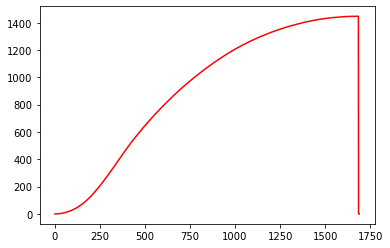

In [104]:
plt.plot(height, 'r')
plt.show()

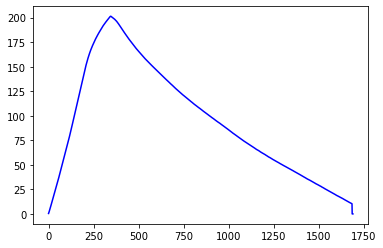

In [105]:
plt.plot(velocity, 'b')
plt.show()

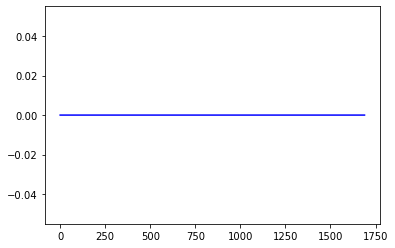

In [106]:
plt.plot(acc, 'b')
plt.show()

In [108]:
max(velocity)

201.43105256484262